In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('demo21_2022.csv', sep=';')
data = data.replace('20143)', '2014')
data['year'] = data['year'].apply(lambda x: int(x))
data = data.set_index('year')
data = data.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 6'], axis=1)
data.head()

,birth,death,delta
year,,,
1950,2745997,1031010,1714987
1960,2782353,886090,1896263
1970,1903713,1131183,772530
1980,2202779,1525755,677024
1990,1988858,1655993,332865


In [4]:
people = pd.read_csv('demo13.csv', sep=';')
people = people.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 6'], axis=1)
people = people.dropna()
people['year'] = people['year'].apply(lambda x: int(x))
people = people.set_index('year')
people['people'] = people['people'].apply(lambda x: x.replace(',', '.'))
people['men'] = people['men'].apply(lambda x: x.replace(',', '.'))
people['women'] = people['women'].apply(lambda x: x.replace(',', '.'))
people = people.astype(float)
people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1926 to 2023
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   people  31 non-null     float64
 1   men     31 non-null     float64
 2   women   31 non-null     float64
dtypes: float64(3)
memory usage: 992.0 bytes


In [5]:
merged = pd.merge(data, people, on='year')
merged = merged[1:]
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2001 to 2022
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   birth   22 non-null     int64  
 1   death   22 non-null     int64  
 2   delta   22 non-null     int64  
 3   people  22 non-null     float64
 4   men     22 non-null     float64
 5   women   22 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.2 KB


In [6]:
merged

,birth,death,delta,people,men,women
year,,,,,,
2001,1311604,2254856,-943252,146.3,68.3,78.0
2002,1396967,2332272,-935305,145.2,67.6,77.6
2003,1477301,2365826,-888525,145.0,67.5,77.5
2004,1502477,2295402,-792925,144.3,67.0,77.3
2005,1457376,2303935,-846559,143.8,66.7,77.1
2006,1479637,2166703,-687066,143.2,66.3,76.9
2007,1610122,2080445,-470323,142.8,66.0,76.8
2008,1713947,2075954,-362007,142.8,66.0,76.8
2009,1761687,2010543,-248856,142.7,65.9,76.8


Text(0.5, 1.0, 'Общее количество жителей')

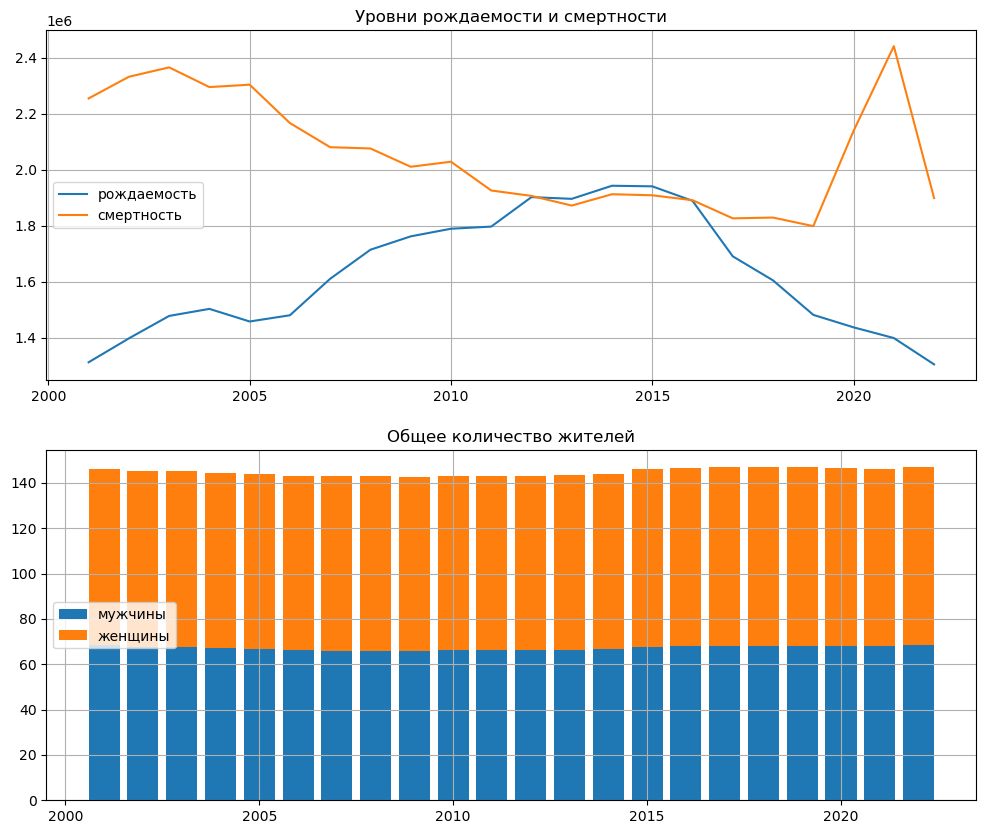

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
ax[0].plot(merged['birth'], label='рождаемость')
ax[0].plot(merged['death'], label='смертность')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Уровни рождаемости и смертности')

plt.bar(x=merged.index, height=merged['men'], label='мужчины')
plt.bar(x=merged.index, height=merged['women'], bottom=merged['men'], label='женщины')
ax[1].grid()
ax[1].legend(loc='center left')
ax[1].set_title('Общее количество жителей')

In [8]:
df = pd.read_csv('chisl_RF_01-01-2022_VPN-2020.csv', sep=';', encoding='cp1251')
df = df.dropna(axis=0)
df.columns
df = df.rename(columns={
    'Содержание':'place',
    'Все население':'all_people',
    'Unnamed: 2':'all_men',
    'Unnamed: 3':'all_women',
    'Unnamed: 2':'all_men',
    'Городское население':'all_city',
    'Unnamed: 5':'city_men',
    'Unnamed: 6':'city_women',
    'Сельское население':'all_village',
    'Unnamed: 8':'village_men',
    'Unnamed: 9':'village_women'
})
df = df.replace('–', 0)
df[['all_people', 'all_men', 'all_women', 'all_city', 'city_men', 'city_women', 'all_village', 'village_men', 'village_women']] = df[['all_people', 'all_men', 'all_women', 'all_city', 'city_men', 'city_women', 'all_village', 'village_men', 'village_women']].astype(int)
df

,place,all_people,all_men,all_women,all_city,city_men,city_women,all_village,village_men,village_women
2,Российская Федерация,146980061,68378429,78601632,109982329,50494451,59487878,36997732,17883978,19113754
3,Центральный федеральный округ,40298032,18678072,21619960,33097200,15221092,17876108,7200832,3456980,3743852
4,Белгородская область,1536466,712397,824069,1003348,455190,548158,533118,257207,275911
5,Брянская область,1164635,533625,631010,809640,363213,446427,354995,170412,184583
6,Владимирская область,1342235,609524,732711,1041666,466521,575145,300569,143003,157566
...,...,...,...,...,...,...,...,...,...,...
93,Амурская область,763570,361556,402014,520498,242519,277979,243072,119037,124035
94,Магаданская область,135907,66125,69782,130987,63505,67482,4920,2620,2300
95,Сахалинская область,466009,222622,243387,384377,183055,201322,81632,39567,42065
96,Еврейская автономная область,149580,70237,79343,105877,47908,57969,43703,22329,21374


In [11]:
df['all_people'].sort_values(ascending=False)

2     146980061
3      40298032
52     28869534
75     16758520
35     16718204
        ...    
76       210808
96       149580
94       135907
97        47906
26        41426
Name: all_people, Length: 96, dtype: int32

Text(0.5, 1.0, 'Гендерный состав')

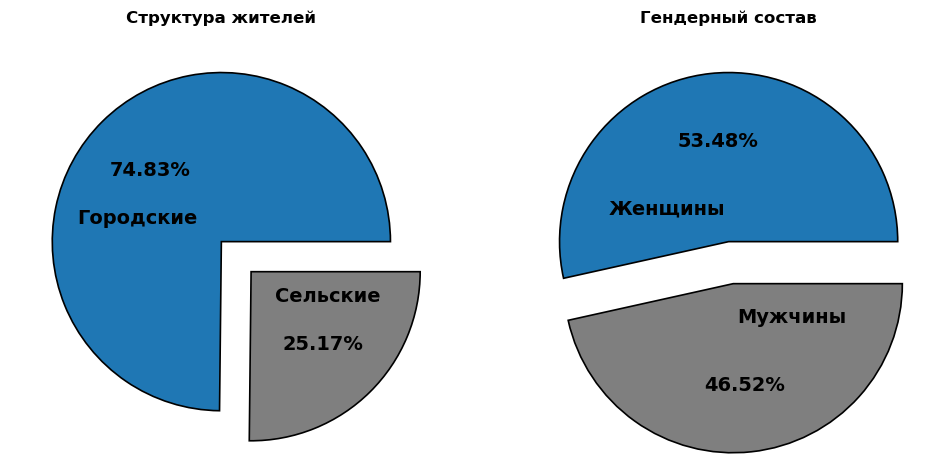

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].pie(
    df[['all_city', 'all_village']].iloc[0],
    labels=('Городские', 'Сельские'),
    colors=('tab:blue','C7'),
    autopct='%.2f%%',
    explode=(0, 0.25),
    labeldistance=0.2,
    wedgeprops={'lw':1.2,'edgecolor':'k'},
    textprops={'fontweight':'semibold', 'fontsize':14}
)
ax[0].set_title('Структура жителей', fontweight='bold')

ax[1].pie(
    df[['all_women', 'all_men']].iloc[0],
    labels=('Женщины', 'Мужчины'),
    colors=('tab:blue','C7'),
    autopct='%.2f%%',
    explode=(0, 0.25),
    labeldistance=0.2,
    wedgeprops={'lw':1.2,'edgecolor':'k'},
    textprops={'fontweight':'semibold', 'fontsize':14}
)
ax[1].set_title('Гендерный состав', fontweight='bold')

In [63]:
prog = pd.read_csv('progn1.csv', sep=';', encoding='cp1251')
prog.rename(columns={'Unnamed: 0':'year'}, inplace=True)
prog = prog.set_index('year')
for col in prog.columns:
    prog[col] = prog[col].str.replace(',', '.').astype(float)
prog = prog.dropna()
prog


,l_all,l_delta,l_delta_self,l_delta_mig,m_all,m_delta,m_delta_self,m_delta_mig,h_all,h_delta,h_delta_self,h_delta_mig
year,,,,,,,,,,,,
2021,146412.8,-424.2,-554.1,129.9,146650.1,-113.2,-374.9,261.7,146888.2,190.6,-156.1,346.7
2022,145988.6,-567.9,-662.9,95.0,146536.9,-164.5,-423.4,258.9,147078.8,203.1,-148.7,351.8
2023,145420.7,-657.0,-724.6,67.6,146372.4,-236.5,-493.2,256.7,147281.9,163.0,-192.8,355.8
2024,144763.7,-731.5,-776.6,45.1,146135.9,-277.6,-532.5,254.9,147444.9,137.5,-221.3,358.8
2025,144032.2,-788.2,-823.5,35.3,145858.3,-318.8,-572.2,253.4,147582.4,131.4,-230.4,361.8
2026,143244.0,-831.7,-859.9,28.2,145539.5,-328.6,-583.2,254.6,147713.8,132.4,-232.3,364.7
2027,142412.3,-856.6,-883.5,26.9,145210.9,-328.0,-583.5,255.5,147846.2,144.3,-223.5,367.8
2028,141555.7,-876.2,-901.6,25.4,144882.9,-313.8,-570.4,256.6,147990.5,169.2,-201.5,370.7
2029,140679.5,-892.0,-916.1,24.1,144569.1,-295.1,-552.5,257.4,148159.7,201.3,-172.6,373.9


<BarContainer object of 15 artists>

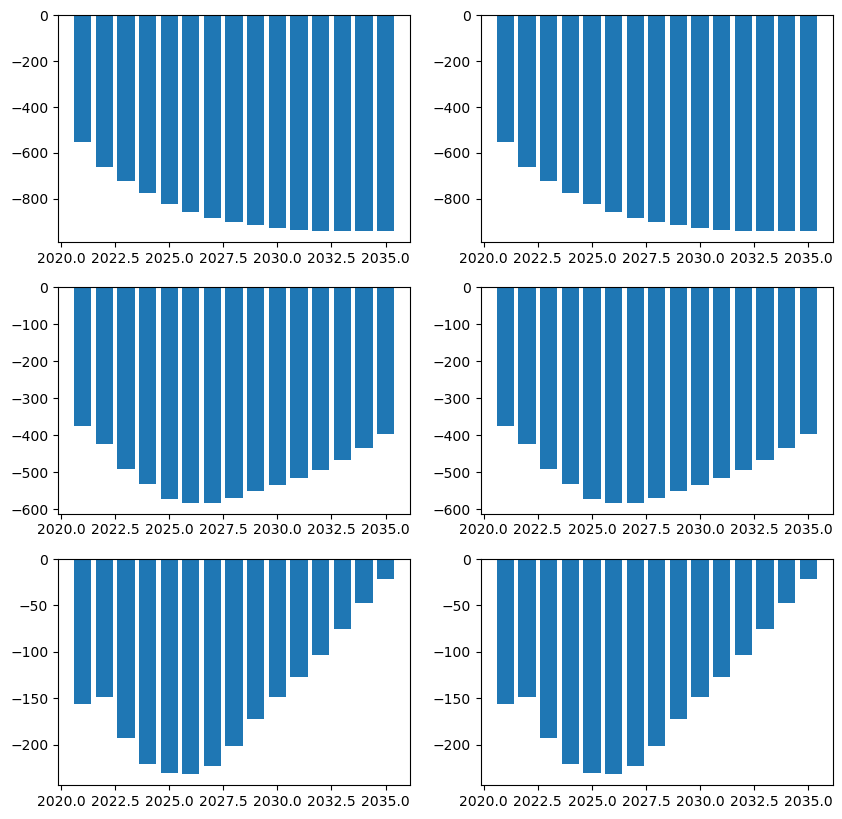

In [84]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

ax[0,0].bar(x=prog.index, height=prog['l_delta_self'])
ax[1,0].bar(x=prog.index, height=prog['m_delta_self'])
ax[2,0].bar(x=prog.index, height=prog['h_delta_self'])

ax[0,1].bar(x=prog.index, height=prog['l_delta_self'])
ax[1,1].bar(x=prog.index, height=prog['m_delta_self'])
ax[2,1].bar(x=prog.index, height=prog['h_delta_self'])

In [6]:
from bottle import route, run

@route('/hello')
def hello():
    a = input('Введи первое число')
    b = input('Введи второе число')
    c = int(a) + int(b)
    return c

run(host='localhost', port=8080, debug=True)

Bottle v0.12.25 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [28/Jul/2023 16:51:11] "GET / HTTP/1.1" 404 720
